<a href="https://colab.research.google.com/github/nnh92/Kmeans-Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(297, 2)
[[2.649 1.384]
 [1.788 2.264]
 [4.629 4.242]
 [3.665 4.859]
 [1.228 3.126]
 [4.188 3.998]
 [1.51  4.964]
 [3.652 2.53 ]
 [3.893 2.712]
 [3.231 4.205]
 [4.172 4.864]
 [1.528 4.624]
 [4.948 2.998]
 [4.581 3.295]
 [2.858 2.421]
 [3.669 1.584]
 [2.151 1.252]
 [3.724 2.669]
 [1.892 1.036]
 [2.444 1.258]
 [1.851 3.988]
 [2.484 3.629]
 [4.893 2.684]
 [3.974 1.371]
 [3.023 3.528]
 [3.679 4.088]
 [3.956 4.491]
 [1.8   2.616]
 [4.293 4.895]
 [3.103 4.268]
 [1.202 2.8  ]
 [1.22  4.067]
 [2.433 4.939]
 [3.801 4.219]
 [1.592 4.077]
 [2.098 4.228]
 [3.278 3.185]
 [2.951 1.646]
 [2.611 2.842]
 [3.955 2.064]
 [3.244 1.574]
 [4.493 3.931]
 [2.181 3.197]
 [2.157 1.021]
 [2.597 4.805]
 [1.98  3.01 ]
 [2.175 1.862]
 [2.014 3.841]
 [2.613 3.349]
 [2.055 2.776]
 [1.814 1.444]
 [4.049 2.276]
 [2.126 3.158]
 [4.702 4.362]
 [2.841 1.102]
 [1.423 1.095]
 [1.883 2.091]
 [2.584 2.759]
 [3.767 3.568]
 [4.594 1.687]
 [2.288 1.861]
 [1.731 3.283]
 [3.973 3.982]
 [1.377 2.476]
 [1.641 4.033]
 [3.061 1.815]
 

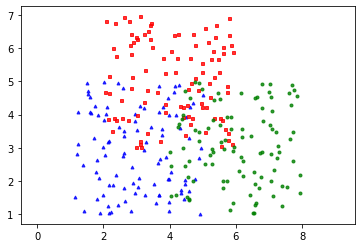

check ok
check ok


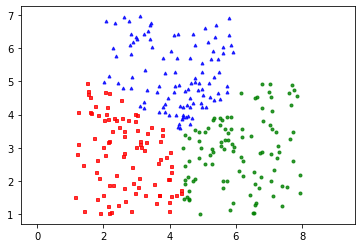

In [4]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

dtA = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-A.csv').values
dtB = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-B.csv').values
dtC = pd.read_csv('https://raw.githubusercontent.com/nnh92/Kmeans-Clustering/main/Database-C.csv').values

X = np.concatenate((dtA,dtB,dtC), axis =0)
K = 3

original_label = np.asarray([0]*len(dtA) + [1]*len(dtB) + [2]*len(dtC)).T
#print(original_label)
print(X.shape)
print(X)

def kmeans_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label==0,:]
  X1 = X[label==1,:]
  X2 = X[label==2,:]
  X3 = X[label==3,:]
  X4 = X[label==4,:]
  X5 = X[label==5,:]
  X6 = X[label==6,:]
  plt.plot(X0[:,0],X0[:,1],'b^',markersize = 3, alpha = .8)
  plt.plot(X1[:,0],X1[:,1],'rs',markersize = 3, alpha = .8)
  plt.plot(X2[:,0],X2[:,1],'go',markersize = 3, alpha = .8)
  plt.plot(X3[:,0],X3[:,1],'r*',markersize = 3, alpha = .8)
  plt

  plt.axis('equal')
  plt.title('Point view')
  plt.plot()
  plt.show()


#print(dtA)
#print(X)

kmeans_display(X,original_label)

def kmeans_int_centers(X,k):
  return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_assign_label(X,centers):
  D = cdist(X,centers)
  return np.argmin(D, axis = 1)

#print(X.shape[0])
#int_centers = kmeans_int_centers(X,3)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    Xk = X[labels == k,:]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

#print(X.shape[0])

def kmeans_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
  centers = [kmeans_int_centers(X, K)]
  i = 0
  labels = []
  while True:
    labels.append(kmeans_assign_label(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1],K)
    if kmeans_converged(centers[-1],new_centers):
      print('check ok')
      break
    centers.append(new_centers)
    i += 1
  return (centers , labels, i)

kmeans(X, K)

(centers, labels, i) = kmeans(X, K)
kmeans_display(X, labels[-1])



#print([kmeans_int_centers(X,3)])
